In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
titani_df=pd.read_csv('train.csv')
titani_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titani_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
titani_df['Age'].fillna(titani_df['Age'].mean(),inplace=True)
titani_df['Cabin'].fillna('N',inplace=True)
titani_df['Embarked'].fillna('N',inplace=True)
titani_df.isnull().sum().sum()

0

In [6]:
print('Sex:',titani_df['Sex'].value_counts())
print('cabin:',titani_df['Cabin'].value_counts())
print('Embarked:',titani_df['Embarked'].value_counts())


Sex: male      577
female    314
Name: Sex, dtype: int64
cabin: N              687
C23 C25 C27      4
G6               4
B96 B98          4
C22 C26          3
              ... 
E34              1
C7               1
C54              1
E36              1
C148             1
Name: Cabin, Length: 148, dtype: int64
Embarked: S    644
C    168
Q     77
N      2
Name: Embarked, dtype: int64


In [7]:
titani_df['Cabin']=titani_df['Cabin'].str[:1]
titani_df['Cabin'].head()

0    N
1    C
2    N
3    C
4    N
Name: Cabin, dtype: object

In [8]:
titani_df.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

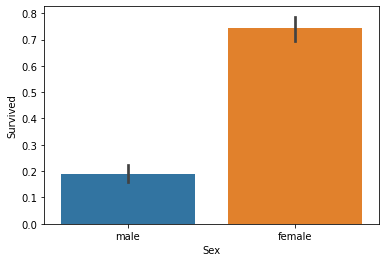

In [9]:
sns.barplot(x='Sex',y='Survived', data=titani_df)

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

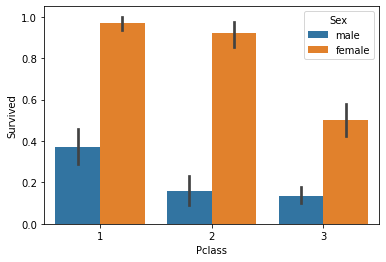

In [10]:
sns.barplot(x='Pclass',y='Survived', hue='Sex',data=titani_df)

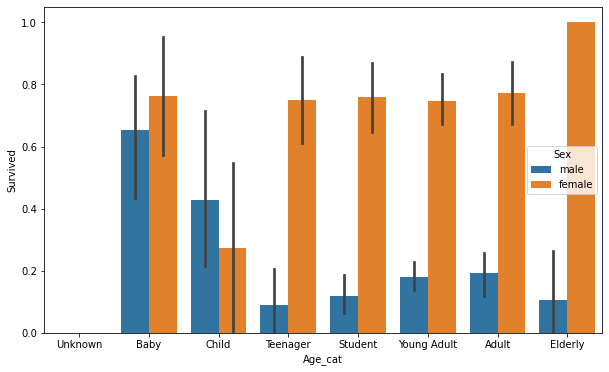

In [13]:
def get_category(age):
    cat=''
    if age<=-1: cat='Unknown'
    elif age <=5: cat='Baby'
    elif age<=12: cat='Child'
    elif age<=18: cat='Teenager'
    elif age<=25: cat='Student'
    elif age<=35: cat='Young Adult'
    elif age<=60: cat='Adult'
    else: cat='Elderly'

    return cat

plt.figure(figsize=(10,6))
group_names=['Unknown', 'Baby','Child','Teenager','Student','Young Adult','Adult','Elderly']
titani_df['Age_cat']=titani_df['Age'].apply(lambda x: get_category(x))
sns.barplot(x='Age_cat', y='Survived', hue='Sex', data=titani_df, order=group_names)
titani_df.drop('Age_cat',axis=1, inplace=True)

In [14]:
from sklearn.preprocessing import LabelEncoder

def encode_feature(dataDF):
    feature=['Cabin','Sex','Embarked']
    for feature in feature:
        le=LabelEncoder()
        le=le.fit(dataDF[feature])
        dataDF[feature]=le.transform(dataDF[feature])

    return dataDF

titani_df=encode_feature(titani_df)
titani_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,7,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,7,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,7,3


In [6]:
def fillna(df):
    df['Age'].fillna(df['Age'].mean(),inplace=True)
    df['Cabin'].fillna('N',inplace=True)
    df['Embarked'].fillna('N',inplace=True)
    df['Fare'].fillna(0,inplace=True)
    return df

def drop_features(df):
    df.drop(['PassengerId','Name','Ticket'], axis=1, inplace=True)
    return df

def format_features(df):
    df['Cabin']=df['Cabin'].str[:1]
    feature=['Cabin','Sex','Embarked']
    for feature in feature:
        le=LabelEncoder()
        le=le.fit(df[feature])
        df[feature]=le.transform(df[feature])

    return df

def transform_features(df):
    df=fillna(df)
    df=drop_features(df)
    df=format_features(df)
    return df


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np

In [22]:
y_titanic_df=titani_df['Survived']
x_titanic_df=titani_df.drop('Survived',axis=1)

#전처리
x_titanic_df=transform_features(x_titanic_df)
#분리
X_train, X_test, y_train, y_test=train_test_split(x_titanic_df,y_titanic_df,test_size=0.2,random_state=11)
#모델생성 및 예측
dt_clf=DecisionTreeClassifier(random_state=11)
rt_clf=RandomForestClassifier(random_state=11)
lr_clf=LogisticRegression(solver='liblinear')

dt_clf.fit(X_train,y_train)
dt_pred=dt_clf.predict(X_test)
print('DecisionTreeClassifier 정확도: {0:.4f}'.format(accuracy_score(y_test,dt_pred)))

rt_clf.fit(X_train,y_train)
rt_pred=rt_clf.predict(X_test)
print('RandomForestClassifier 정확도: {0:.4f}'.format(accuracy_score(y_test,rt_pred)))

lr_clf.fit(X_train,y_train)
lr_pred=lr_clf.predict(X_test)
print('로지스틱회귀 정확도: {0:.4f}'.format(accuracy_score(y_test,lr_pred)))


DecisionTreeClassifier 정확도: 0.7877
RandomForestClassifier 정확도: 0.8547
로지스틱회귀 정확도: 0.8659


## 1) 교차검증

In [23]:
from sklearn.model_selection import KFold, cross_val_score

def exec_kfold(clf, folds=5):
    kfold=KFold(n_splits=folds)
    scores=[]
    for iter_count, (train_idex, test_idex) in enumerate(kfold.split(x_titanic_df)):
        X_train, X_test=x_titanic_df.values[train_idex],x_titanic_df.values[test_idex]  #e데이터 프레임이라 values
        y_train, y_test=y_titanic_df.values[train_idex],y_titanic_df.values[test_idex]  
        clf.fit(X_train,y_train)
        predictions=clf.predict(X_test)
        accuracy=accuracy_score(y_test, predictions)
        scores.append(accuracy)        
        print('교차검증 {0} 정확도:{1:.4f}'.format(iter_count,accuracy))

    means_score=np.mean(scores)
    print('평균 정확도:{0:4f}'.format(means_score))
exec_kfold(dt_clf, folds=5)

교차검증 0 정확도:0.7542
교차검증 1 정확도:0.7809
교차검증 2 정확도:0.7865
교차검증 3 정확도:0.7697
교차검증 4 정확도:0.8202
평균 정확도:0.782299


In [24]:
scores=cross_val_score(dt_clf,x_titanic_df,y_titanic_df,cv=5)
for iter_count, accuracy in enumerate(scores):
    print('교차검증 {0} 정확도 :{1:.4f}'.format(iter_count,accuracy))
print('평균 정확도 :{0:.4f}'.format(np.mean(scores)))

교차검증 0 정확도 :0.7430
교차검증 1 정확도 :0.7753
교차검증 2 정확도 :0.7921
교차검증 3 정확도 :0.7865
교차검증 4 정확도 :0.8427
평균 정확도 :0.7879


In [30]:
from sklearn.model_selection import GridSearchCV

parameters={'max_depth':[2,3,5,10],
            'min_samples_split':[2,3,5], 'min_samples_leaf':[1,5,8]}

grid_dclf=GridSearchCV(dt_clf, param_grid=parameters, scoring='accuracy', cv=5)
grid_dclf.fit(X_train,y_train)

print("최고 하이퍼 파라미터:",grid_dclf.best_params_)
print("최고 정확도 :",grid_dclf.best_score_)
best_dclf=grid_dclf.best_estimator_
dpredict=best_dclf.predict(X_test)
accuracy=accuracy_score(y_test, dpredict)
print('테스트 최고 정확도:',accuracy)

최고 하이퍼 파라미터: {'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}
최고 정확도 : 0.7991825076332119
테스트 최고 정확도: 0.8715083798882681


## 오차행렬

In [1]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
import numpy as np

In [3]:


def get_clf_eval(y_test, pred):
    confusion= confusion_matrix(y_test,pred)
    accuracy=accuracy_score(y_test,pred)
    precision=precision_score(y_test,pred)
    recall=recall_score(y_test,pred)
    print('오차행렬')
    print(confusion)
    print('정확도:{0:.4f} , 정밀도 :{1:.4f}, 재현율:{2:.4f}'.format(accuracy,precision,recall))
    


In [7]:
titani_df=pd.read_clipboard('\n')

y_titanic_df=titani_df['Survived']
x_titanic_df=titani_df.drop('Survived',axis=1)

#전처리
x_titanic_df=transform_features(x_titanic_df)
#분리
X_train, X_test, y_train, y_test=train_test_split(x_titanic_df,y_titanic_df,test_size=0.2,random_state=11)
#모델생성 및 예측
lr_clf=LogisticRegression(solver='liblinear')

lr_clf.fit(X_train,y_train)
lr_pred=lr_clf.predict(X_test)
get_clf_eval(y_test, lr_pred)

오차행렬
[[108  10]
 [ 14  47]]
정확도:0.8659 , 정밀도 :0.8246, 재현율:0.7705


In [8]:
pred_proba=lr_clf.predict_proba(X_test)
pred=lr_clf.predict(X_test)
print(f'pred_proba()결과 shape;{pred_proba.shape}')
print('pred_proba array에서 앞 3개만 추출 \n:',pred_proba[:3])
pred_proba_result=np.concatenate([pred_proba,pred.reshape(-1,1)],axis=1)
print('두개의 클래스중에서 더 큰 확률을 클래스 값으로 예측\n',pred_proba_result[:3])

pred_proba()결과 shape;(179, 2)
pred_proba array에서 앞 3개만 추출 
: [[0.44935228 0.55064772]
 [0.86335513 0.13664487]
 [0.86429645 0.13570355]]
두개의 클래스중에서 더 큰 확률을 클래스 값으로 예측
 [[0.44935228 0.55064772 1.        ]
 [0.86335513 0.13664487 0.        ]
 [0.86429645 0.13570355 0.        ]]


In [14]:
from sklearn.preprocessing import Binarizer
x=[[1,-1,2],
   [2,0,0],
   [0,1.1,1.2]]

#개별 원소들이 임계값보다 크면 1
binarizer=Binarizer(threshold=1.1)
binarizer.fit_transform(x)

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.]])

In [15]:
custom_threshold=0.5
# posirive 클래스 칼럼 하나만 추출해 적용
pred_proba_1=pred_proba[:,1].reshape(-1,1)
binarizer=Binarizer(threshold=custom_threshold).fit(pred_proba_1)
custom_predict=binarizer.transform(pred_proba_1)

get_clf_eval(y_test, custom_predict)

오차행렬
[[108  10]
 [ 14  47]]
정확도:0.8659 , 정밀도 :0.8246, 재현율:0.7705


In [16]:
pred_proba_1=pred_proba[:,1].reshape(-1,1)
binarizer=Binarizer(threshold=custom_threshold)
custom_predict=binarizer.fit_transform(pred_proba_1)

get_clf_eval(y_test, custom_predict)

오차행렬
[[108  10]
 [ 14  47]]
정확도:0.8659 , 정밀도 :0.8246, 재현율:0.7705


In [17]:
#임계값 0.4
custom_threshold=0.4
# posirive 클래스 칼럼 하나만 추출해 적용
pred_proba_1=pred_proba[:,1].reshape(-1,1)
binarizer=Binarizer(threshold=custom_threshold).fit(pred_proba_1)
custom_predict=binarizer.transform(pred_proba_1)

get_clf_eval(y_test, custom_predict)

오차행렬
[[97 21]
 [11 50]]
정확도:0.8212 , 정밀도 :0.7042, 재현율:0.8197


임계값 낮추니 재현율 증가, 정밀도 떨어짐
- 분류 결정 임계값은 positive 예측값을 결정하는 기준이라 true의 증가!!

In [19]:
from sklearn.metrics import precision_recall_curve

#레이블이 1일때 예측할 확률
pred_proba_class1=lr_clf.predict_proba(X_test)[:,1]

#임곗값별 정밀도와 재현율  
precision, recalls, thresholds =precision_recall_curve(y_test, pred_proba_class1)
print('반환된 분류 결정 임계값 배열의 shape:', thresholds.shape)

thr_index=np.arange(0,thresholds.shape[0],15)
print('샘플 추출을 위한 임계값 배열의 index 10개:',thr_index)
print('샘플용 10개의 임곗값:', np.round(thresholds[thr_index],3))

print('샘플 임계값별 정밀도:', np.round(precision[thr_index],3))
print('샘플 임계값별 재현율:', np.round(recalls[thr_index],3))

반환된 분류 결정 임계값 배열의 shape: (147,)
샘플 추출을 위한 임계값 배열의 index 10개: [  0  15  30  45  60  75  90 105 120 135]
샘플용 10개의 임곗값: [0.116 0.132 0.149 0.173 0.257 0.376 0.492 0.629 0.759 0.896]
샘플 임계값별 정밀도: [0.379 0.424 0.455 0.519 0.618 0.676 0.797 0.93  0.964 1.   ]
샘플 임계값별 재현율: [1.    0.967 0.902 0.902 0.902 0.82  0.77  0.656 0.443 0.213]


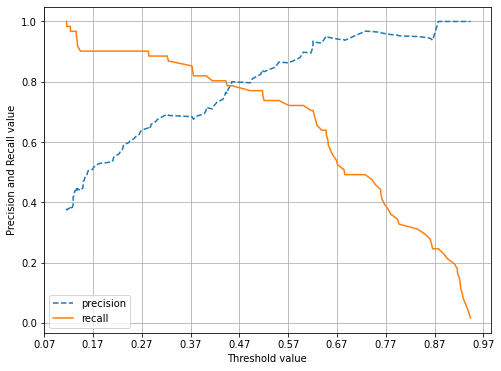

In [21]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

def precision_recall_curve_plot(y_test, pred_proba_c1):
    precisions, recalls, thresholds=precision_recall_curve(y_test,pred_proba_c1)
    
    plt.figure(figsize=(8,6))
    threshold_boundary=thresholds.shape[0]
    plt.plot(thresholds,precisions[0:threshold_boundary], linestyle='--',label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')

    start, end =plt.xlim()
    plt.xticks(np.round(np.arange(start, end,0.1),2))

    plt.xlabel('Threshold value')
    plt.ylabel('Precision and Recall value')
    plt.legend()
    plt.grid()
    plt.show()
precision_recall_curve_plot(y_test, lr_clf.predict_proba(X_test)[:,1])

In [22]:
from sklearn.metrics import f1_score
f1=f1_score(y_test, pred)
print('F1 스코어 :{0:.4f}'.format(f1))

F1 스코어 :0.7966


In [9]:
from sklearn.metrics import roc_curve

#레이블 값이 1일때의 예측 확률을 추출
pred_proba_class1=lr_clf.predict_proba(X_test)[:,1]
fprs, tprs, thresholds=roc_curve(y_test,pred_proba_class1)

thr_index=np.arange(1,thresholds.shape[0],5)
print('샘플 추출을 위한 임곗값 배열의 index:', thr_index)
print('샘플 index로 추출한 임곗값:',np.round(thresholds[thr_index],2))

print('샘플 임곗값별 fpr:',np.round(fprs[thr_index],3))
print('샘플 임곗값별 tpr:',np.round(tprs[thr_index],3))


샘플 추출을 위한 임곗값 배열의 index: [ 1  6 11 16 21 26 31 36 41 46]
샘플 index로 추출한 임곗값: [0.94 0.73 0.62 0.52 0.44 0.28 0.15 0.14 0.13 0.12]
샘플 임곗값별 fpr: [0.    0.008 0.025 0.076 0.127 0.254 0.576 0.61  0.746 0.847]
샘플 임곗값별 tpr: [0.016 0.492 0.705 0.738 0.803 0.885 0.902 0.951 0.967 1.   ]


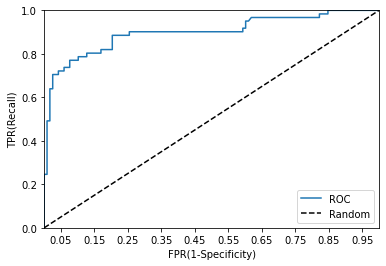

In [12]:
import matplotlib.pyplot as plt
def roc_curve_plot(y_test, pred_proba_c1):
    fprs, tprs, thresholds=roc_curve(y_test,pred_proba_c1)
    plt.plot(fprs,tprs,label='ROC')
    plt.plot([0,1],[0,1],'k--',label='Random')

    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start,end,0.1),2))
    plt.xlim(0,1);plt.ylim(0,1)
    plt.xlabel('FPR(1-Specificity)')
    plt.ylabel('TPR(Recall)')
    plt.legend()
roc_curve_plot(y_test, pred_proba[:,1])
    

In [13]:
from sklearn.metrics import roc_auc_score

pred_proba=lr_clf.predict_proba(X_test)[:,1]
roc_score=roc_auc_score(y_test,pred_proba)
print('ROC AUC 값: {0:.4F}'.format(roc_score))

ROC AUC 값: 0.8987
